#Nama : Ahmad Fathan Syakir
#NIM  : 0110217055

#1. importing essential library

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

#2. Load dataset

In [ ]:
dataset = pd.read_csv('breast-cancer-wisconsin.data')
dataset.head()

In [60]:
df = dataset.rename(columns={'1000025':'Sample','5':'Clump Thickness', '1':'Uniformity of Cell Size', '1.1':'Uniformity of Cell Shape', '1.2':'Marginal Adhesion', '2':'Single Epithelial Cell Size', '1.3':'Bare Nuclei', '3':'Bland Chromatin', '1.4':'Normal Nucleoli', '1.5':'Mitoses', '2.1':'Class'})
df.drop(columns=['Sample'],inplace=True)
df.replace({'Class':{2:'benign', 4:'malignant'}},inplace=True)

In [91]:
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,4,4,5,7,10,3,2,1,benign
1,3,1,1,1,2,2,3,1,1,benign
2,6,8,8,1,3,4,3,7,1,benign
3,4,1,1,3,2,1,3,1,1,benign
4,8,10,10,8,7,10,9,7,1,malignant


#3. checking any missing value

In [ ]:
df.info()

In [ ]:
df['Clump Thickness'].value_counts()

In [ ]:
df['Uniformity of Cell Size'].value_counts()

In [ ]:
df['Uniformity of Cell Shape'].value_counts()

In [ ]:
df['Marginal Adhesion'].value_counts()

In [ ]:
df['Single Epithelial Cell Size'].value_counts()

In [ ]:
df['Bare Nuclei'].value_counts()

In [ ]:
df['Bland Chromatin'].value_counts()

In [ ]:
df['Normal Nucleoli'].value_counts()

In [ ]:
df['Mitoses'].value_counts()

In [ ]:
df['Class'].value_counts()

#4. General Statistics

In [ ]:
df.describe().plot(kind = "area", fontsize=15, figsize = (15,5), table = True, colormap="rainbow")
plt.xlabel('statistics',)
plt.ylabel('value')
plt.title("general statistics of breast-cancer-wisconsin dataset", fontsize=20)

#5. Visualization

**Countplot**

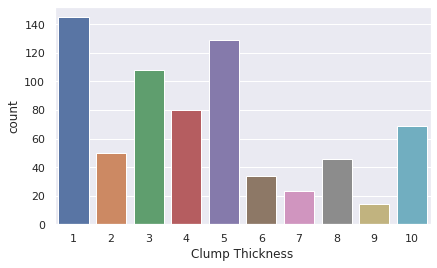

In [96]:
sns.countplot('Clump Thickness',data=df)

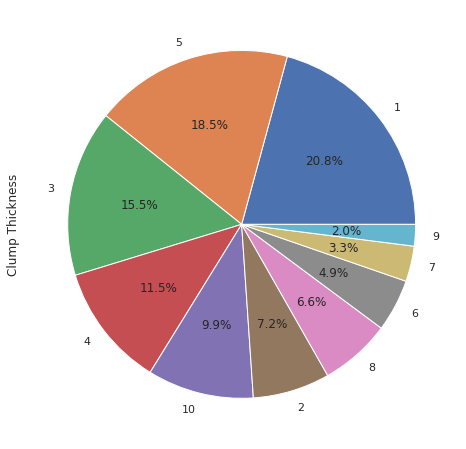

In [97]:
df['Clump Thickness'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(10,8))
plt.show()

**Jointplot**

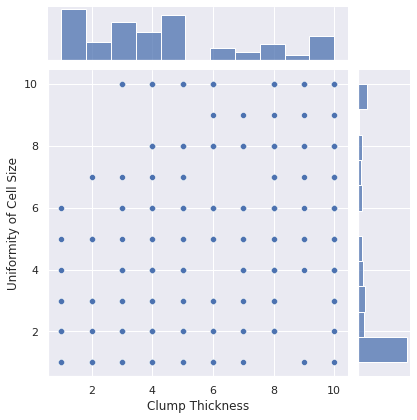

In [98]:
fig=sns.jointplot(x='Clump Thickness',y='Uniformity of Cell Size',data=df)
fig

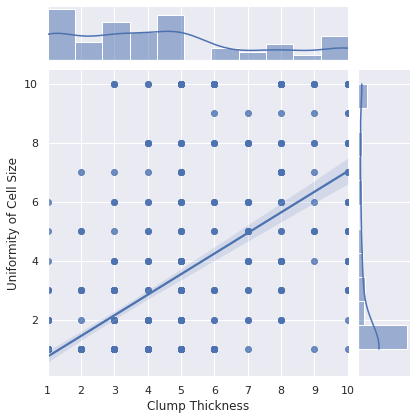

In [99]:
sns.jointplot(x='Clump Thickness',y='Uniformity of Cell Size',data=df, kind="reg")

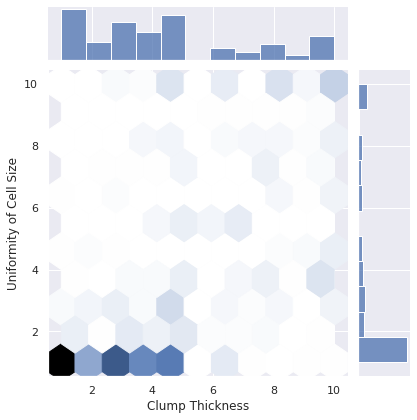

In [100]:
fig=sns.jointplot(x='Clump Thickness',y='Uniformity of Cell Size',kind='hex',data=df)

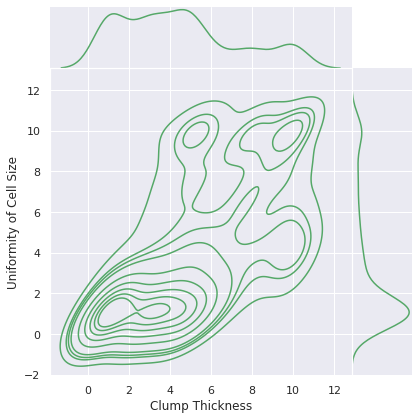

In [101]:
sns.jointplot(x='Clump Thickness',y='Uniformity of Cell Size',data=df, kind='kde', space=0,color='g')

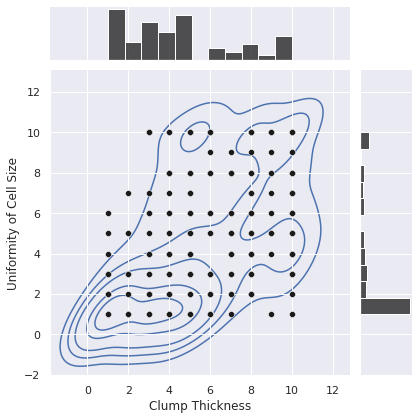

In [102]:
g = (sns.jointplot("Clump Thickness", "Uniformity of Cell Size",data=df, color="k").plot_joint(sns.kdeplot, zorder=0, n_levels=6))

**FacetGrid**

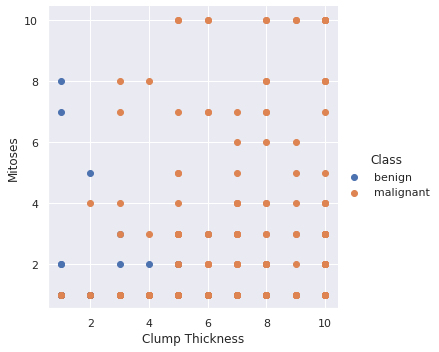

In [103]:
import matplotlib.pyplot as plt
%matplotlib inline
sns.FacetGrid(df,hue='Class',size=5)\
.map(plt.scatter,'Clump Thickness','Mitoses')\
.add_legend()

**BoxPlot**

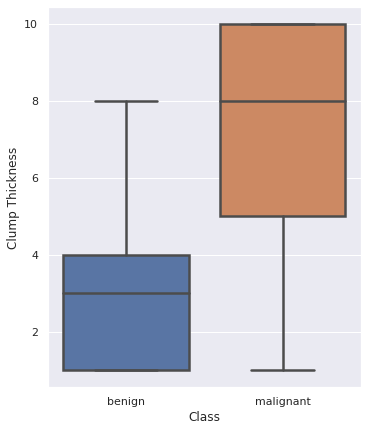

In [104]:
fig=plt.gcf()
fig.set_size_inches(5,7)
fig=sns.boxplot(x='Class',y='Clump Thickness',data=df,linewidth=2.5,orient='v',dodge=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9a52b03ef0>,
      dtype=object)

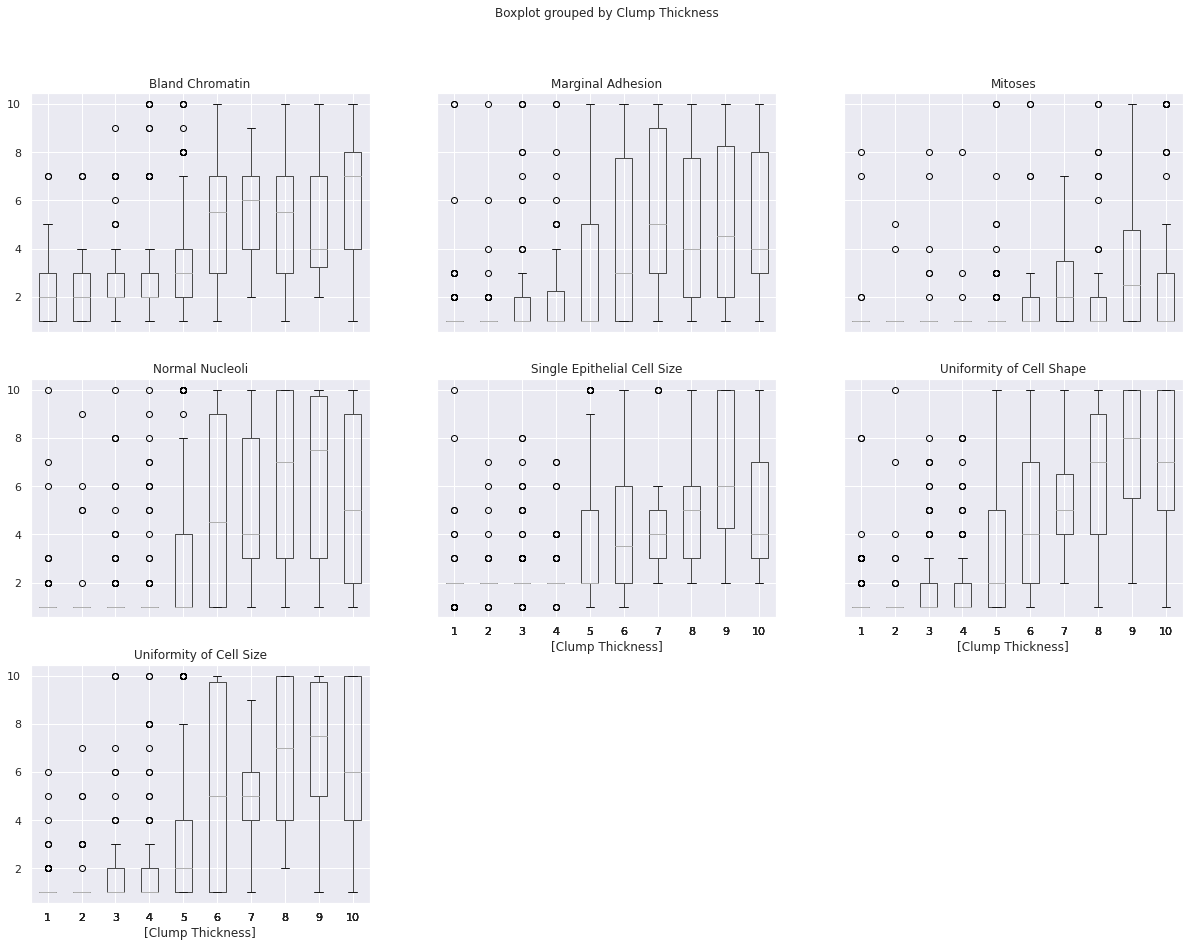

In [105]:
df.boxplot(by="Clump Thickness", figsize=(20, 15))

**stripplot**

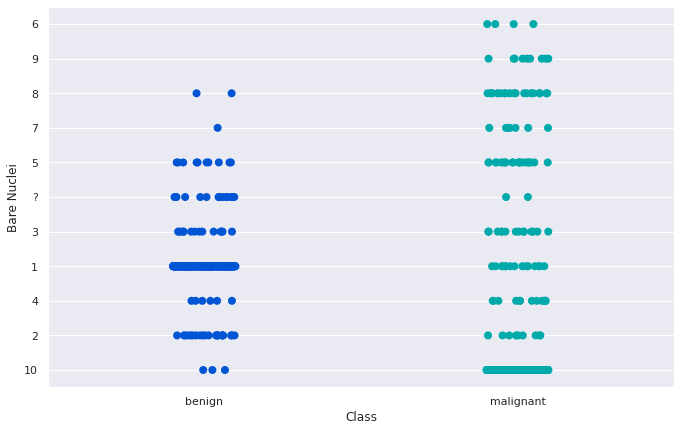

In [106]:
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.stripplot(x='Class',y='Bare Nuclei',data=df,jitter=True,edgecolor='gray',size=8,palette='winter',orient='v')

**Combination of boxplot and stripplot**

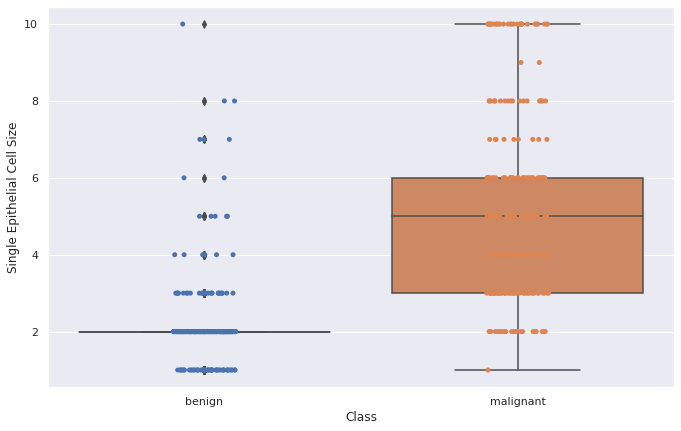

In [107]:
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.boxplot(x='Class',y='Single Epithelial Cell Size',data=df)
fig=sns.stripplot(x='Class',y='Single Epithelial Cell Size',data=df,jitter=True,edgecolor='gray')

**Violinplot**

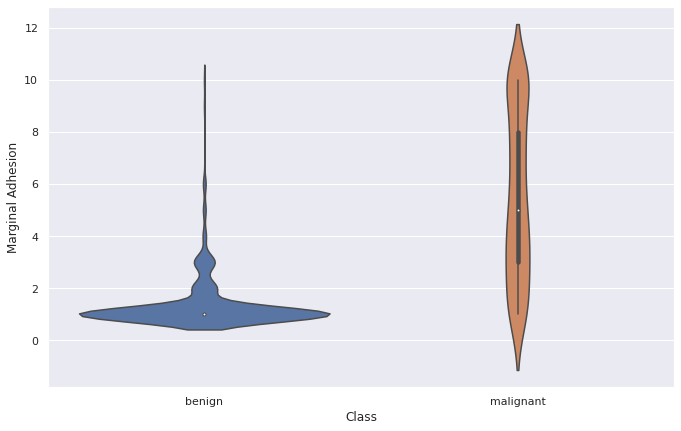

In [108]:
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.violinplot(x='Class',y='Marginal Adhesion',data=df)

**Pairplot**

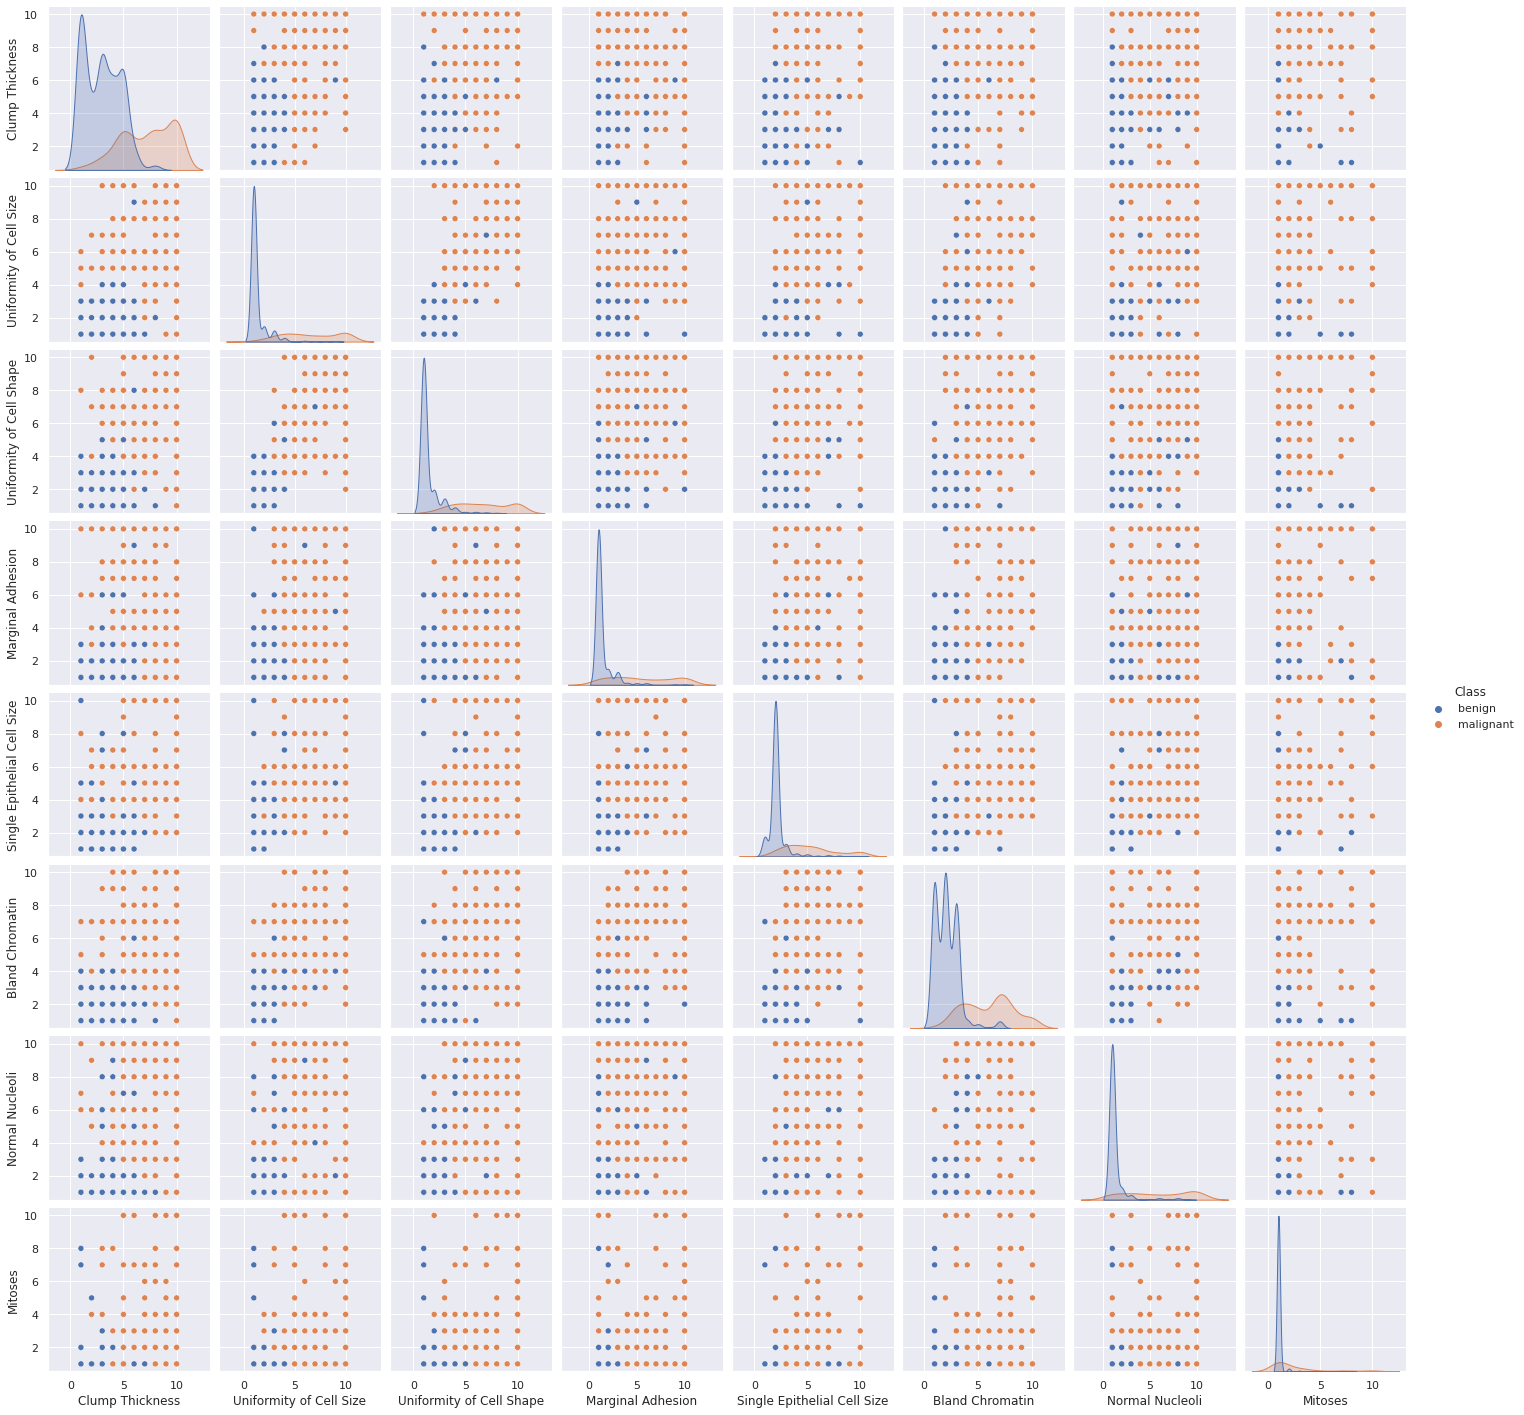

In [109]:
  sns.pairplot(df, hue='Class')

**Histogram**

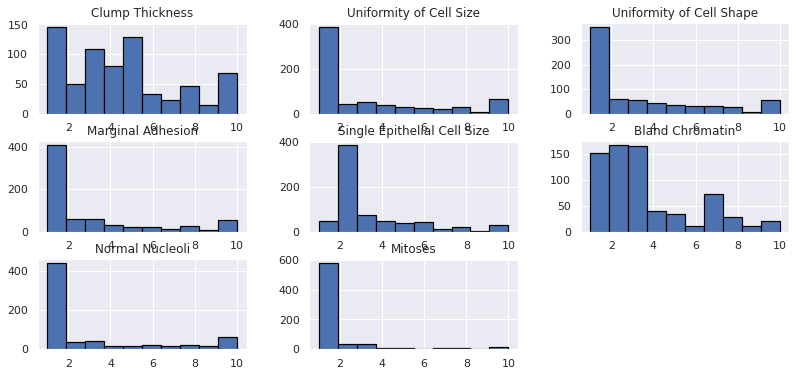

In [110]:
df.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)

**Swarmplot**

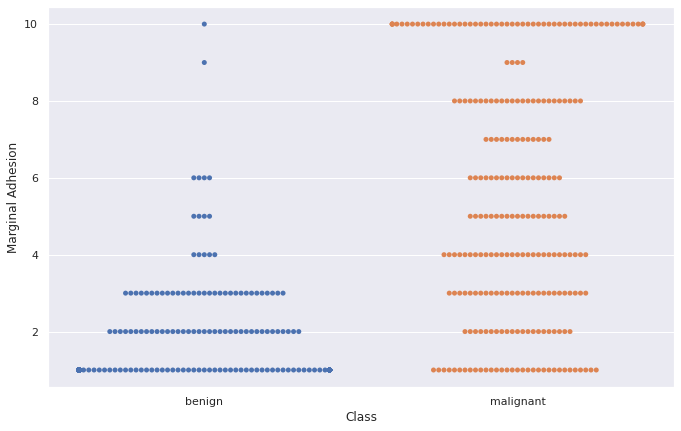

In [111]:
sns.set(style="darkgrid")
fig=plt.gcf()
fig.set_size_inches(10,7)
fig = sns.swarmplot(x="Class", y="Marginal Adhesion", data=df)

**Violin + swarmplot**

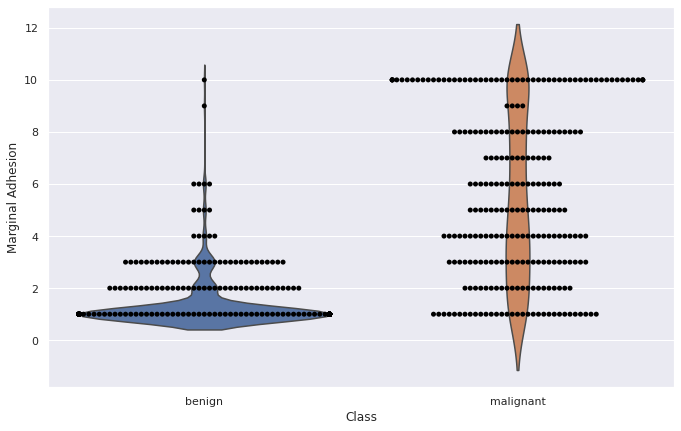

In [112]:
sns.set(style="darkgrid")
fig=plt.gcf()
fig.set_size_inches(10,7)
ax = sns.violinplot(x="Class", y="Marginal Adhesion", data=df, inner=None)
ax = sns.swarmplot(x="Class", y="Marginal Adhesion", data=df,color="black", edgecolor="black")

**Species based classification**

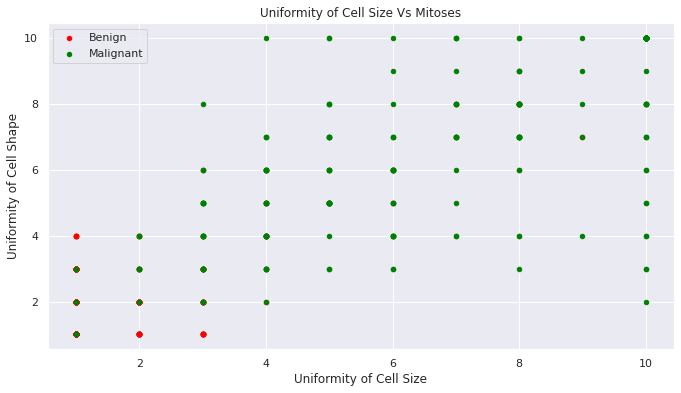

In [113]:
sns.set(style="darkgrid")
sc=df[df.Class=='benign'].plot(kind='scatter',x='Uniformity of Cell Size',y='Uniformity of Cell Shape',color='red',label='Benign')
df[df.Class=='malignant'].plot(kind='scatter',x='Uniformity of Cell Size',y='Uniformity of Cell Shape',color='green',label='Malignant',ax=sc)
sc.set_xlabel('Uniformity of Cell Size')
sc.set_ylabel('Uniformity of Cell Shape')
sc.set_title('Uniformity of Cell Size Vs Mitoses')
sc=plt.gcf()
sc.set_size_inches(10,6)

**LM Plot**

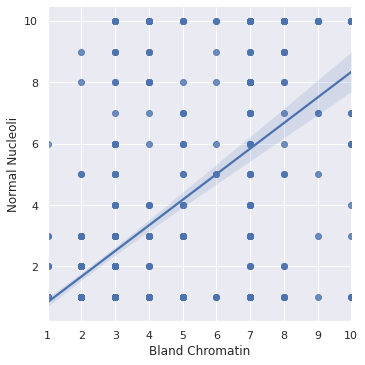

In [114]:
fig=sns.lmplot(x="Bland Chromatin", y="Normal Nucleoli",data=df)

**Facet Grid**

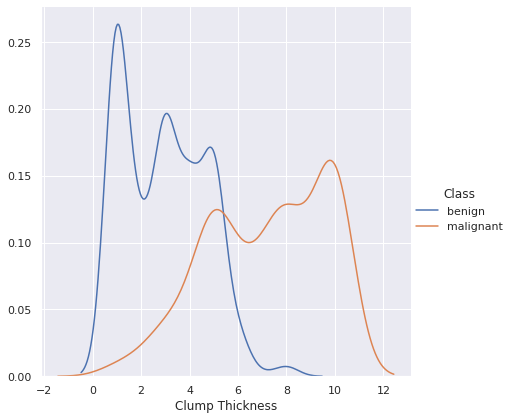

In [115]:
sns.FacetGrid(df, hue="Class", size=6) \
   .map(sns.kdeplot, "Clump Thickness") \
   .add_legend()
plt.ioff() 